# Advanced Machine Learning (MScA, 32017)

# Project Paraphrase Detection, Part 2

# Introduction to Keras

### Yuri Balasanov, Leonid Nazarov, &copy; iLykei 2017

Keras is an open source neural network library written in Python. It is capable of running on top of MXNet, Deeplearning4j, Tensorflow, CNTK or Theano. Designed to enable fast experimentation with deep neural networks, it focuses on being minimal, modular and extensible. It was developed as part of the research effort of project ONEIROS (Open-ended Neuro-Electronic Intelligent Robot Operating System), and its primary author and maintainer is François Chollet, a Google engineer.

# Data for examples

Examples in this notebook use [**breast cancer wisconsin dataset**](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). 

The breast cancer dataset is a well known data for binary classification. It was created by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA.

Features are created from a digitized images of a [fine needle aspirate (FNA)](https://en.wikipedia.org/wiki/Fine-needle_aspiration), a biopsy method, of a breast mass. They describe characteristics of the cell nuclei present in the image.

To create the dataset Dr. Wolberg used ﬂuid samples, taken from patients with solid breast masses and graphical software [Xcyt](http://software.broadinstitute.org/mpg/xcyt/) capable of performing analysis of cytological features on a digital scan. 

Main research article on the subject of this analysis, including an image of malignant cells, is [Wisconsin Breast Cancer Dataset and Machine Learning for Breast Cancer Detection, by Lucas Rodrigues Borges](https://www.researchgate.net/publication/311950799_Analysis_of_the_Wisconsin_Breast_Cancer_Dataset_and_Machine_Learning_for_Breast_Cancer_Detection [accessed Nov 09 2017]).

The data set has following characteristics:

- Classes:	2
- Samples per class:	212(malignant), 357(benign)
- Samples total:	569
- Dimensionality:	30
- Features:	real, positive

Load the data using utility *load_breast_cancer* from *sklearn.datasets* module. <br>
Print names of the features and dimensions of the data.

In [1]:
%matplotlib inline
from sklearn.datasets import load_breast_cancer
data  = load_breast_cancer()
print(data.feature_names)
print('data',data.data.shape,'labels',data.target.shape)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
data (569, 30) labels (569,)


# Sequential model

The core data structure of Keras is **model**, a way to organize layers of the neural network. <br>

The simplest type of model is the Sequential model, a linear stack of layers.<br>

Design a simple neural network with one hidden layer consisting of 3 neurons.  

First, define the type of the model.

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten

model =  Sequential() # create model

Specify the first (hidden) layer.

In [6]:
model.add(Dense(units=3, input_dim=30)) # add hidden layer

Alternative way of calling the same function creating hidden layer is: <br>

`model.add(Dense(3, input_dim=30, activation='relu')).` <br>

Parameter `input_dim` sets number of inputs (predictors). <br>
Parameter `activation` is set to `relu` which is a common [activation function](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) for neural networks.

Input layer is not explicitly created. Instead, only number of neurons (features) that feed into the first hidden layer, needs to be specified (30 for the breast cancer dataset). 

There is also no need to worry about the input dimensions for subsequent layers: neurons in the previous layer form input for the next layer. The output dimension of the first hidden layer is equal to 3. 

Selection of activation function for the hidden layer csn br donr from the list of available activations, providing formulas for the most popular ones: 

- softmax(x) :   $f_{i}(x)=\frac{e^{x_{i}}}{\sum_{i=1}^{n}e^{x_{i}}},i=1,...,n$
- elu(x)
- selu(x)
- softplus(x) = $ln(1 + e^{x})$
- softsign(x) = $\frac {x}{1+|x|}$
- relu(x) = $max(0,x)$; (those familiar with options trading will recognize call option payof function in `relu`)
- tanh(x) 
- sigmoid(x) = $\frac {1}{1+e^{-x}}$
- hard_sigmoid(x)
- linear(x) = $x$
- LeakyReLU(x,alpha) = $max(\alpha *x,x)$

Select 'relu' as activation function usually providing faster convergence relative to 'tanh' or 'sigmoid'.

In [7]:
model.add(Activation('relu')) 

Add the output layer with 1 neuron and 'sigmoid' activation function producing predictive probability for Class 1.

In [8]:
# output layer for binary classification
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

The following plot displays the nework architecture and explains the nature of **Dense** (fully connected) layer: each neuron of it is connected with all input variables of the next layer.
 
![Model plot](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Machine%20Learning%2FLecture%207%20AdvML%2FR_nn_plot.png)

The picture was created with function *plot()* from R **neuralnet** package. <br>

Keras has tools for model visualization too. Module *keras.utils.vis_utils* provides utility functions to plot a Keras model (using **graphviz**). Unlike the above R function this utility does not show neurons. It describes network in terms of layers.   

The code below plots another graph of the same network model: 

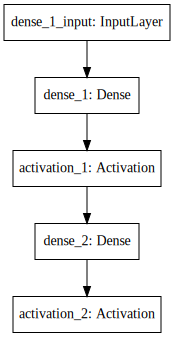

In [11]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [10]:
import pydot
#print pydot.find_graphviz()

 You can also save it to a file and then plot it with the function *plot_model*.  
 *plot_model* takes two optional arguments:
- *show_shapes* (defaults to False) controls whether output shapes are shown in the graph.
- *show_layer_names* (defaults to True) controls whether layer names are shown in the graph.


In [12]:
from keras.utils import plot_model
plot_model(model, to_file='model1.png',show_shapes=True,show_layer_names=True)

Here is the plot of the the same network model with additional information loaded from the file *model1.png* using a line of markdown code:

"! [model] (./Path to model)"

The resulting plot is:

![Model plot](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Machine%20Learning%2FLecture%207%20AdvML%2Fmodel1.png)

Summary of the model can also be shown including layers types, shapes and the number of parameters:

In [13]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 93        
_________________________________________________________________
activation_1 (Activation)    (None, 3)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
_________________________________________________________________
activation_2 (Activation)    (None, 1)                 0         
Total params: 97
Trainable params: 97
Non-trainable params: 0
_________________________________________________________________
None


Use more compact syntax for describing the same Sequential network: 

In [14]:
model =  Sequential()
model.add(Dense(3, input_dim=30,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

or even define the model in one line.

In [15]:
model = Sequential([Dense(3, input_dim=30),Activation('relu'),
    Dense(1),Activation('sigmoid')])

# More complex architecture. Functional API

Keras functional API provides tools for defining more complex models, such as multi-output models, directed acyclic graphs, or models with shared layers. 

Models are defined by creating instances of layers and connecting them directly to each other pair by pair, then defining a model that specifies the layers to act as the input and output to the model.

Define the above simple model using functional API. 

Start with the input layer. Recall that input layer was not explicitly created in sequential model. Here it must be created and defined as a standalone Input layer that specifies the shape of input data.

The input layer takes shape (tensor shape) argument that is a tuple that indicates the dimensionality of the input data.

When input is one-dimensional, as in the example above, the shape must explicitly leave room for the shape of the mini-batch size used when splitting the data during training process. 

Therefore, the shape tuple is always defined with a hanging last dimension:

In [16]:
from keras.layers import Input

# This returns a tensor
inputs = Input(shape=(30,))
inputs

<tf.Tensor 'input_1:0' shape=(?, 30) dtype=float32>

A layer instance is callable (on a tensor), and it returns a tensor. The layers in the model are connected pairwise. <br>
This is done by specifying where the input comes from when defining each new layer. 

The following line of code states that the input of Dense layer 'hidden_1' comes from *inputs*. <br> 

In [17]:
hidden = Dense(3, activation='relu',name='hidden_1')(inputs)

Parameter *name* is optional. It can be used to pass a name of any layer as an argument.<br>

Define the output layer and create a model.

In [18]:
from keras.models import Model
output = Dense(1, activation='sigmoid')(hidden)
model_API = Model(inputs=inputs, outputs=output)

Model class is used to create a model from layers. It requires only the input and output layers specifications.

Here is the model we built.
![model_API](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Machine%20Learning%2FLecture%207%20AdvML%2Fmodel_API.png)  


## Concatenating inputs

Consider now more complex models. 

For such constructions inputs need to be *concatenated* from a list of inputs.

Input is taken as a list of tensors and the result is a single tensor, the concatenation of all inputs. 

All tensors must have the same shape except for the concatenation axis. <br>

The meaning of the condition above can be illustrated on a simple example of tensors of rank 2 which are matrices. <br>
Consider 2 matrices $A,~B$ with the same number of columns, but different number of rows:
$$A=\{a_{i,j},~i=0,1,2;~j=0,1,2,3 \};~B=\{b_{i,j},~i=0,1,2,3,4;~j=0,1,2,3 \}.$$
These matrices as inputs can be concatenated by first dimension (axis), i.e. by appending rows of $B$ to rows of $A$. <br>
But they cannot be concatenated by the second dimension: columns of $A$ cannot be concatenated with columns of $B$ because the numbers of rows are different.

Build a model with two inputs using layer of concatenated inputs.

In [23]:
from keras.layers import concatenate
input1 = Input(shape=(10,), name='input_1')
hidden = Dense(3, activation='relu',name='hidden1')(input1)
input2 = Input(shape=(5,), name='input_2')
merge = concatenate([hidden,input2], name='merge')
hidden2 = Dense(3, activation='relu',name='hidden2')(merge)
output = Dense(1, activation='sigmoid')(hidden2)
model_2_inputs = Model(inputs=[input1,input2], outputs=output)
plot_model(model_2_inputs, to_file='model_2_inputs.png',show_shapes=True,show_layer_names=True)

Here is the result.
![model_2_inputs](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Machine%20Learning%2FLecture%207%20AdvML%2Fmodel_2_inputs.png)  

## Shared layers

Another way of adding flexibility to network design is shared layers.

In Quora project we need to identify duplicated pairs of questions. 

One way to achieve this is to: 
- Encode two questions into two vectors; 
- Feed vectors to the same layer and compare outputs. Similar questions should produce similar outputs.  

To share a layer across different inputs, simply instantiate the layer once, then call it on as many inputs as necessary:

In [21]:
input1 = Input(shape=(8,), name='input_1')
input2 = Input(shape=(8,), name='input_2')
shared = Dense(5, activation='relu',name='shared')
x1 = shared(input1)
x2 = shared(input2)
output1 = Dense(1, activation='sigmoid', name='output_1')(x1)
output2 = Dense(1, activation='sigmoid', name='output_2')(x2)
model_shared = Model(inputs=[input1,input2], outputs=[output1,output2])
plot_model(model_shared, to_file='model_shared.png',
           show_shapes=True,show_layer_names=True)

We got the model with two inputs, two outputs and shared layer
![model_shared](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Machine%20Learning%2FLecture%207%20AdvML%2Fmodel_shared.png)  

Note that when we reuse the same layer instance  multiple times, the weights of the layer  are also being reused  (it is effectively the same layer)

<font color=blue>

**Assignment 1**

Write code creating the following network architecture as *test_model1*.

![test_model1](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Machine%20Learning%2FLecture%207%20AdvML%2Ftest_model1.png) 

Print out the plot of the resulting model.

Enter code in the following cell.

In [22]:
#Skipped code
# Assignment 1
input1 = Input(shape=(3,), name='input_1')
hidden1 = Dense(5, activation='relu',name='hidden1')(input1)
input2 = Input(shape=(6,), name='input_2')
merge1 = concatenate([hidden1,input2], name='merge1')
input3 = Input(shape=(11,), name='input_3')
shared = Dense(11, activation='relu',name='shared')
x1 = shared(merge1)
x2 = shared(input3)
x2 = Dense(9, activation='relu',name='hidden2')(x2)
merge = concatenate([x1,x2], name='merge2')
output1 = Dense(1, activation='sigmoid', name='output_1')(merge)
test_model1 = Model(inputs=[input1,input2,input3], outputs=output1)

plot_model(test_model1, to_file='test_model1.png',
          show_shapes=True,show_layer_names=True)


# Compile model

Once the model plot is finalized, configure its learning process using *compile()*:

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='sgd')

Here *'model'* is the sequential model created above.  

Compillation of the model requires declaration of the loss function (objective function) and the optimizer.

Keras has a variety of [loss functions](https://keras.io/losses/) and [optimizers](https://keras.io/optimizers/) to choose from. 

An optional parameter *metric* also can be set. Metric is a function (or list of functions) that is used to judge the performance of the model. 

Metric can be selected from the [list of available metrics](https://keras.io/metrics/) or passed as custom metric function name during the compilation step. <br>
The function would need to take  *(y_true, y_pred)* as arguments and return a single tensor value.

In the example below we use logarithmic loss as objective function, which for a binary classification problem is defined in Keras as *'binary_crossentropy'*. 

We  also use gradient descent algorithm 'adam' and choose *'accuracy'* as metric for collectiing and reporting during training.

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

# Fit model on training data

Train or fiting the model on loaded data is done by calling method *'fit'* on the model. 

Split the breast cancer dataset into train and test subsets and define simple sequential model with two hidden layers

In [26]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target,
                                                    test_size=0.2, random_state=1)
def get_model_1():
    model =  Sequential()
    model.add(Dense(5, input_dim=30,activation='relu'))
    model.add(Dense(10,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])    
    return model


Creating and compiling model by a function instead of creating it directly allows experimenting and fitting with the model multiple times. <br>
If model is fitted again it will use the previously fitted weights which makes fitting experiment incorrect. <br>
In order to reinitialize weights call function generating the model.  

Fit the model on train set using 10 epochs and iterating on the data in batches of 32 samples.

- Parameter *'epoch'* is an arbitrary cutoff, typically means one pass over entire dataset, used to separate training process in distinct phases. <br>
- Parameter *'batch_size'* is size of batch, a set of samples (observations) that is a subsample processed simultaneously. Processing of each batch results in one update of the network weights. <br>
- Batch approximates distribution of weights better than single observation. The larger the batch the better the approximation. But larger batch processing requires more memory. 
- For evaluation or prediction it is recommended to use as large batch size as mempry allows since it makes the inference faster.

In [22]:
model = get_model_1()
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
455/455 [==============================] - 0s - loss: 10.0959 - acc: 0.3736     
Epoch 2/10
455/455 [==============================] - 0s - loss: 10.0959 - acc: 0.3736     
Epoch 3/10
455/455 [==============================] - 0s - loss: 10.0959 - acc: 0.3736     
Epoch 4/10
455/455 [==============================] - 0s - loss: 10.0959 - acc: 0.3736     
Epoch 5/10
455/455 [==============================] - 0s - loss: 10.0959 - acc: 0.3736    
Epoch 6/10
455/455 [==============================] - 0s - loss: 10.0960 - acc: 0.3736    
Epoch 7/10
455/455 [==============================] - 0s - loss: 10.0959 - acc: 0.3736    
Epoch 8/10
455/455 [==============================] - 0s - loss: 10.0960 - acc: 0.3736    
Epoch 9/10
455/455 [==============================] - 0s - loss: 10.0959 - acc: 0.3736     
Epoch 10/10
455/455 [==============================] - 0s - loss: 10.0959 - acc: 0.3736     


There is no progress in training process. <br>
Scale the input data and fit  the model again.

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = get_model_1()
hist = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
455/455 [==============================] - 0s - loss: 0.7751 - acc: 0.3516     
Epoch 2/10
455/455 [==============================] - 0s - loss: 0.6760 - acc: 0.5341     
Epoch 3/10
455/455 [==============================] - 0s - loss: 0.6065 - acc: 0.7407     
Epoch 4/10
455/455 [==============================] - 0s - loss: 0.5479 - acc: 0.8374     
Epoch 5/10
455/455 [==============================] - 0s - loss: 0.4856 - acc: 0.8747     
Epoch 6/10
455/455 [==============================] - 0s - loss: 0.4205 - acc: 0.9011     
Epoch 7/10
455/455 [==============================] - 0s - loss: 0.3563 - acc: 0.9209     
Epoch 8/10
455/455 [==============================] - 0s - loss: 0.3030 - acc: 0.9297     
Epoch 9/10
455/455 [==============================] - 0s - loss: 0.2586 - acc: 0.9341     
Epoch 10/10
455/455 [==============================] - 0s - loss: 0.2222 - acc: 0.9407     


Scaling significantly improved fitting results. 

Method *'fit'* returns a History object. <br>
Its History.history attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

In [22]:
print(hist.history.keys())
print('best train loss', min(hist.history["loss"]))

dict_keys(['loss', 'acc'])
best train loss 0.222168984469


Now predict test labels using method *'predict'* and evaluate prediction.

In [23]:
pred1 = model.predict(X_test)
pred1.shape

(114, 1)

Method *evaluate* returns values of all metrics the model calculates. Their names are in the attribute *.metrics_names*.

In [24]:
print(model.metrics_names)
print(model.evaluate(X_test, y_test,verbose=0))

['loss', 'acc']
[0.26024451328997028, 0.92982455722072666]


<font color=blue>
**Assignment 2**
Compare loss of our network on the train  data scaled with *MinMaxScaler* and *StandardScaler*. <br>
Run fiting process 10 times for each scaler and average the results. <br>
Set  *verbose=0* in the *'fit()'* call to remove unnecessary logging. <br>
Results may differ unsignificantly from the sample printout.

In [25]:
#Skipped code
# Assignment 2
#MinMaxScaler
#0 0.590108319953
#1 0.589973957591
#2 0.502516596461
#3 0.551777010632
#4 0.492175462875
#5 0.578729445201
#6 0.555293402043
#7 0.595016273299
#8 0.577328508634
#9 0.556122513001
#average loss =  0.558904148969

#StandardScaler
#0 0.44238442307
#1 0.398653513324
#2 0.274371146108
#3 0.337022536731
#4 0.400712529251
#5 0.283597299326
#6 0.234807680596
#7 0.237801259797
#8 0.248024749887
#9 0.176053563153
#average loss =  0.303342870124



## Batch normalization in Keras

Keras has its own tool for data scaling: *'BatchNormalization'* layer. <br>
It normalizes the activations of the previous layer at each batch, i.e. applies a transformation that maintains the mean activation (previous layer' output) close to 0 and the activation standard deviation close to 1. <br>
Sergey Ioffe and Christian Szegedy show in [Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift](https://arxiv.org/abs/1502.03167) that Batch Normalization improves convergence speed  of deep neural networks.  

In order to apply BatchNormalization to the *pevious_layer* in Keras functional API you need two lines of code:

`*from keras.layers import BatchNormalization*`  
`*scaled = BatchNormalization()(input1)*`

<font color=blue>
**Assignment 3**

1. Change function *'get_model_1'* into *'get_model_2'* in functional API and insert BatchNormalization layer after *'input1'*. <br>
2. Currently *X_train, X_test* are scaled. In order to restore the original train and test split the data again. 
3. Run fiting 10 times and average results. 
4. Set verbose=0 in the fit() call to remove unnecessary logging. 
5. Print loss function on every iteration.
6. Compare average loss for  MinMaxScaler, StandardScaler and BatchNormalization.

Results of different runs may not be exactly the same.

In [26]:
#Skipped code
# Assignment 3 code

#0 0.322570931387
#1 0.323956322997
#2 0.240647373062
#3 0.201014531576
#4 0.25480208731
#5 0.223247167042
#6 0.35539250924
#7 0.235532289121
#8 0.336723536449
#9 0.207742149293
#average loss =  0.270162889748




# Callbacks

Keras has a set of functions that can be used to get a view on internal states and statistics of the model during training. They are called callbacks and *History* mentioned above is one of them.

A list of callbacks can be passed (as the keyword argument *callbacks*) to the  *fit()* method of the Sequential or Model classes. The relevant methods of the callbacks will then be called at each stage of the training.  

Here are some usefull callbacks that will be used below.

- *CSVLogger*  
    *keras.callbacks.CSVLogger(filename, separator=',', append=False)*  
    Callback that streams epoch results to a csv file.  


- *ModelCheckpoint*  
    *keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)*  
    By default save the model to the file *filepath* after every epoch. If  *save_best_only=True* only the latest best model is saved according to the quantity monitored. So one can restart trainning from the last saved state in case of failure. This is important when training deep learning models, which can often be a time-consuming task.  

Here is an example of how we can save the model and restore it later.

In [27]:
from keras.callbacks import ModelCheckpoint

#
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# initialize model
model = get_model_1()
# saves the model weights after each epoch
checkpointer = ModelCheckpoint('weights.hdf5', verbose=1)
model.fit(X_train, y_train, epochs=10, verbose=0, callbacks=[checkpointer])
print('evaluation results of trained model')
print(model.metrics_names)
print(model.evaluate(X_test, y_test,verbose=0))
# reinitialize model
model = get_model_1()
print('evaluation results of reinitialized model')
print(model.evaluate(X_test, y_test,verbose=0))
model.load_weights('weights.hdf5')
print('evaluation results of model with weights loaded from file')
print(model.evaluate(X_test, y_test,verbose=0))

Epoch 00000: saving model to weights.hdf5
Epoch 00001: saving model to weights.hdf5
Epoch 00002: saving model to weights.hdf5
Epoch 00003: saving model to weights.hdf5
Epoch 00004: saving model to weights.hdf5
Epoch 00005: saving model to weights.hdf5
Epoch 00006: saving model to weights.hdf5
Epoch 00007: saving model to weights.hdf5
Epoch 00008: saving model to weights.hdf5
Epoch 00009: saving model to weights.hdf5
evaluation results of trained model
['loss', 'acc']
[0.21692870792589689, 0.92982455722072666]
evaluation results of reinitialized model
[0.70664922396341956, 0.66666666771236216]
evaluation results of model with weights loaded from file
[0.21692870792589689, 0.92982455722072666]


Note that by loading weights from file we restore saved model.

- *EarlyStopping*  
    *keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto')*  
    Stop training when a monitored quantity has stopped improving. Using it we can set large number of epochs but the process will be stopped if validation loss is not improved during *patience* epochs.  

In the example below define *EarlyStopping* callback with *patience=5* and validation loss ("val_loss") as monitored quantity. 

Validation loss can be calculated only if *validation_data* parameter in the *fit* method call is defined. <br>
In this case *validation_data=(X_test, y_test)*. <br>
Allow 200 epochs to train the model.

In [28]:
from keras.callbacks import EarlyStopping
X_train, X_test, y_train, y_test = train_test_split(scaler.transform(data.data), data.target,
                                                    test_size=0.2, random_state=1)
# initialize model
model = get_model_1()
early_stopping = EarlyStopping(monitor="val_loss", patience=5)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=200,
          callbacks=[early_stopping], verbose=1)


Train on 455 samples, validate on 114 samples
Epoch 1/200
455/455 [==============================] - 0s - loss: 9.9673 - acc: 0.3736 - val_loss: 9.9359 - val_acc: 0.3684
Epoch 2/200
455/455 [==============================] - 0s - loss: 9.6829 - acc: 0.3736 - val_loss: 9.4772 - val_acc: 0.3684
Epoch 3/200
455/455 [==============================] - 0s - loss: 8.7335 - acc: 0.3736 - val_loss: 7.9285 - val_acc: 0.3684
Epoch 4/200
455/455 [==============================] - 0s - loss: 6.3948 - acc: 0.3736 - val_loss: 4.6421 - val_acc: 0.3684
Epoch 5/200
455/455 [==============================] - 0s - loss: 3.0749 - acc: 0.3736 - val_loss: 1.8249 - val_acc: 0.3684
Epoch 6/200
455/455 [==============================] - 0s - loss: 1.0763 - acc: 0.3758 - val_loss: 0.5783 - val_acc: 0.8333
Epoch 7/200
455/455 [==============================] - 0s - loss: 0.5916 - acc: 0.7363 - val_loss: 0.5357 - val_acc: 0.8509
Epoch 8/200
455/455 [==============================] - 0s - loss: 0.5095 - acc: 0.8198

455/455 [==============================] - 0s - loss: 0.1659 - acc: 0.9319 - val_loss: 0.1684 - val_acc: 0.9474
Epoch 132/200
455/455 [==============================] - 0s - loss: 0.1620 - acc: 0.9297 - val_loss: 0.1838 - val_acc: 0.9211
Epoch 133/200
455/455 [==============================] - 0s - loss: 0.1746 - acc: 0.9297 - val_loss: 0.1685 - val_acc: 0.9474
Epoch 134/200
455/455 [==============================] - 0s - loss: 0.1661 - acc: 0.9297 - val_loss: 0.1678 - val_acc: 0.9474
Epoch 135/200
455/455 [==============================] - 0s - loss: 0.1659 - acc: 0.9341 - val_loss: 0.1987 - val_acc: 0.9123
Epoch 136/200
455/455 [==============================] - 0s - loss: 0.1827 - acc: 0.9319 - val_loss: 0.1729 - val_acc: 0.9474
Epoch 137/200
455/455 [==============================] - 0s - loss: 0.1784 - acc: 0.9341 - val_loss: 0.2835 - val_acc: 0.8772
Epoch 138/200
455/455 [==============================] - 0s - loss: 0.2229 - acc: 0.9055 - val_loss: 0.1669 - val_acc: 0.9474
Epoch 

EarlyStopping callback terminated process earlier, but the model now is not the best one (according to "val_loss" criterion). The best model was achieved (patience+1) epochs before the end.  

<font color=blue>
**Assignment 4** Modify the last example.

1. Add *ModelCheckpoint* saving the best model to list of callbacks.
2. Fit the model and find validation loss history minimum.
3. Evaluate validation loss with the best model.

In [29]:
#Skipped code
# Assignment 4

#Train on 455 samples, validate on 114 samples
#Epoch 1/200
#455/455 [==============================] - 0s - loss: 0.6614 - acc: 0.6022 - val_loss: 0.6281 - val_acc: 0.6579
#Epoch 2/200
#455/455 [==============================] - 0s - loss: 0.6100 - acc: 0.6615 - val_loss: 0.5865 - val_acc: 0.7018
#Epoch 3/200
#455/455 [==============================] - 0s - loss: 0.5635 - acc: 0.7363 - val_loss: 0.5470 - val_acc: 0.7368
#Epoch 4/200
#455/455 [==============================] - 0s - loss: 0.5184 - acc: 0.7956 - val_loss: 0.5091 - val_acc: 0.7807
#Epoch 5/200
#455/455 [==============================] - 0s - loss: 0.4740 - acc: 0.8374 - val_loss: 0.4735 - val_acc: 0.8070
#Epoch 6/200
#455/455 [==============================] - 0s - loss: 0.4323 - acc: 0.8571 - val_loss: 0.4356 - val_acc: 0.8246

#validation loss history minimum  0.0757933767643
#evaluation results of the best model 0.0757933767643



# Merge layers

Merge layers is a set of layers that merge input tensors  executing arithmetic operations over them or just concatenating them. 

The list of merge layers is not large: 
- Add, Subtract, Multiply, Average, Maximum  - take as input a list of tensors, all of the same shape, and return a single tensor (also of the same shape) - the result of corresponding pointwise arithmetic operation. - Dot - dot product, 
- Concatenate has been already discussed earlier. 

Functional API uses lowercase variants of their names. Import them from *keras.layers* before using, e.g.

`*from keras.layers import add*`

NB! Though *subtract* layer is described in Keras documentation it may not work in earlier versions giving the error message **"cannot import name 'subtract'"** when you try to import it. 
In order to subtract two inputs you may use *Lambda* core layer that wraps arbitrary expression as a Layer object. For instance, the line  

In [30]:
from keras.layers import Input, Lambda
sqr_input = Lambda(lambda x: x*x)(input1)

defines layer that returns squared input. Here is a way of subtracting two inputs using *Lambda* layer

In [31]:
x = Input(shape=(100,))
y = Input(shape=(100,))
# Note: shapes must match!
subtract_layer = Lambda(lambda inputs: inputs[0] - inputs[1])
diff = subtract_layer([x, y])

<font color=blue>
**Assignment 5**

Create network with two inputs. <br>
Input shapes are (10,) and (20,). <br>
Each input is processed with its own Dense layer *hidden1* and *hidden2* consisting of 5 neurons. <br>
The network output should be square of differences of outputs of *hidden1* and *hidden2*. <br>
Draw this network. 

In [32]:
#Skipped code
# Assignment 5 


![test_model5](https://ilykei.com/api/fileProxy/documents%2FAdvanced%20Machine%20Learning%2FLecture%207%20AdvML%2Ftest_model5.png)

# Regularization

One of the major issues with artificial neural networks is that the models are quite complicated. For example, let us consider a neural network that is pulling data from an image from the MNIST database (28 by 28 pixels), feeds into two hidden layers with 30 neurons, and finally reaches a soft-max layer of 10 neurons. The total number of parameters in the network is nearly 25,000. Aparently the model with so many parameters is prone to overfititng.

Keras has a number of layers that can help prevent overfitting.  

### Dropout

Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper [Dropout: A Simple Way to Prevent Neural Networks from Overfitting](http://jmlr.org/papers/volume15/srivastava14a/srivastava14a.pdf).

Dropout is a technique where randomly selected neurons are ignored during training. <br>
They are “dropped-out” randomly. This means that their contribution to the activation of downstream neurons is temporally removed on the forward pass and any weight updates are not applied to the neuron on the backward pass.

Dropout layer can be created as follows

In [33]:
from keras.layers import Dropout
dropout_layer = Dropout(rate=0.1)

where *rate* is float number between 0 and 1 meaning fraction of the input units to drop.

Keras provides a number of Noise layers that are also useful to mitigate overfitting.  

### GaussianNoise

Layer *GaussianNoise(stddev)* applies additive zero-centered Gaussian noise with standard deviation *stdev*. <br>
It could be treated as a form of random data augmentation. Since it is a regularization layer, it is only active at training time.

### GaussianDropout

Layer *GaussianDropout(rate)* applies multiplicative 1-centered Gaussian noise with standard deviation 
$$\sqrt{\frac{rate} { (1 - rate)}}.$$ 
It is only active at training time.

The way of choosing appropriate dropout rate and some other parameters will be shown in TuningNetworks notebook.